### Albania, Canada, China PR, France 네 가지 나라로 분류

In [1]:
import cv2
import numpy as np
import sys
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import os
import pandas as pd

In [2]:
def read_data(fin):
    """ 이미지 파일을 읽어 들여 이미지 데이터, 국가를 리턴"""
    data = pd.read_csv(fin)
    target_li=[]
    data_li=[]
    for i in range(len(data)):
        image_id = int(data.iloc[i][0])
        target_nation = data.iloc[i][3]
        working_dir = fin.split('/')[:-1]
        image_path = '/'.join(working_dir)+'/valid_pictures/'+ target_nation +'/{}.png'.format(image_id)
       
        if (os.path.isfile(image_path)):
            image_data = cv2.imread(image_path, 0)
            data_li.append(image_data)
            target_li.append(target_nation)

    return (np.array(data_li), np.array(target_li))

In [3]:
def create_train_test_data(image_data, label_li):
    #데이터 수, 세로 픽셀, 가로 픽셀 
    n_samples, image_h, image_w = image_data.shape

    X = image_data.reshape(n_samples, -1)
 
    n_features = X.shape[1]
    y = label_li
    #클래스 갯수는 지금 테스트로 돌려볼 때만 4로!!!!
    n_classes = 4
    
    print("total dataset size:")
    print("n_samples: %d" % n_samples)
    print("n_features: %d" % n_features)
    print("n_classes: %d" % n_classes)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    return(X_train, X_test, y_train, y_test)

In [4]:
def extract_features(X_train, X_test, n_components):
    print("Extracting the top %d eigenfaces from %d faces"
         % (n_components, X_train.shape[0]))
    pca = PCA(n_components = n_components,
             svd_solver='randomized', whiten=True).fit(X_train)
    
    eigenfaces = pca.components_.reshape((n_components, 48, 48))
    #주성분 차원바꾸기
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test) 
    
    return(X_train_pca, X_test_pca, eigenfaces)

In [5]:
def train_test_classifier(X_train_pca, X_test_pca, y_train, y_test):
    print("Fitting the classifier to the training set")
    param_grid={'C':[1e3, 5e3, 1e4, 5e4, 1e5],
               'gamma':[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],}
    clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
    clf = clf.fit(X_train_pca, y_train)
    print("best estimator found by grid search")
    print(clf.best_estimator_)
    print("predicting people's names on the test set")
    y_pred = clf.predict(X_test_pca)
    print(classification_report(y_test, y_pred))

In [6]:
from matplotlib import pyplot as plt

def plot_gallery(images, n_col=5):
    n_row = round(images.shape[0]/n_col)
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0.1, left=0.01, right=0.99, top=0.90, hspace=0.35)
    
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i+1)
        #플롯값의 최대치를 흰색으로, 최소치를 검은색으로 변환 ( 특징이 되는 곳이 흰색으로 두드러지게 하는것)
        plt.imshow(images[i], cmap='gray')
        plt.xticks(())
        plt.yticks(())

total dataset size:
n_samples: 1220
n_features: 2304
n_classes: 4
Extracting the top 10 eigenfaces from 915 faces
Fitting the classifier to the training set


C:\Users\HanSung\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator found by grid search
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
predicting people's names on the test set
              precision    recall  f1-score   support

     Albania       0.07      0.33      0.12         3
      Canada       0.17      0.07      0.10        14
    China PR       0.98      0.96      0.97       102
      France       0.91      0.90      0.91       186

    accuracy                           0.88       305
   macro avg       0.53      0.57      0.52       305
weighted avg       0.89      0.88      0.88       305



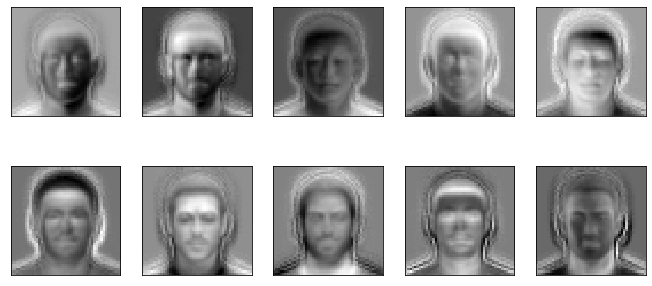

In [7]:
argv = sys.argv
image_data, label = read_data('D:/DL/WAYF/Data/small_test.csv')
n_eigenface = 10
X_train, X_test, y_train, y_test = create_train_test_data(image_data, label)
X_train_pca, X_test_pca, eigenface = extract_features(X_train, X_test, n_eigenface)
train_test_classifier(X_train_pca, X_test_pca, y_train, y_test)
plot_gallery(eigenface)
plt.show()

In [24]:
df = pd.read_csv('D:/DL/WAYF/Data/valid_data.csv')

In [34]:
df.head()

,ID,Name,Photo,Nationality
0,158023,L. Messi,https://cdn.sofifa.org/players/4/19/158023.png,Argentina
1,20801,Cristiano Ronaldo,https://cdn.sofifa.org/players/4/19/20801.png,Portugal
2,190871,Neymar Jr,https://cdn.sofifa.org/players/4/19/190871.png,Brazil
3,193080,De Gea,https://cdn.sofifa.org/players/4/19/193080.png,Spain
4,192985,K. De Bruyne,https://cdn.sofifa.org/players/4/19/192985.png,Belgium


In [35]:
df1 = df

In [36]:
df1 = df1["Nationality"].value_counts()

In [38]:
df1.head()

England      1662
Germany      1198
Spain        1072
Argentina     937
France        914
Name: Nationality, dtype: int64

In [45]:
df2 = df[df["Nationality"].isin(["England", "Germany", "Spain", "Argentina","France"])]

In [48]:
df[df["Nationality"].isin(["England"])].head()

,ID,Name,Photo,Nationality
16,202126,H. Kane,https://cdn.sofifa.org/players/4/19/202126.png,England
59,202652,R. Sterling,https://cdn.sofifa.org/players/4/19/202652.png,England
116,211117,D. Alli,https://cdn.sofifa.org/players/4/19/211117.png,England
134,188377,K. Walker,https://cdn.sofifa.org/players/4/19/188377.png,England
179,204935,J. Pickford,https://cdn.sofifa.org/players/4/19/204935.png,England


In [49]:
df[df["Nationality"].isin(["Germany"])].head()

,ID,Name,Photo,Nationality
11,182521,T. Kroos,https://cdn.sofifa.org/players/4/19/182521.png,Germany
18,192448,M. ter Stegen,https://cdn.sofifa.org/players/4/19/192448.png,Germany
22,167495,M. Neuer,https://cdn.sofifa.org/players/4/19/167495.png,Germany
33,178603,M. Hummels,https://cdn.sofifa.org/players/4/19/178603.png,Germany
54,222492,L. Sané,https://cdn.sofifa.org/players/4/19/222492.png,Germany


In [50]:
df[df["Nationality"].isin(["Spain"])].head()

,ID,Name,Photo,Nationality
3,193080,De Gea,https://cdn.sofifa.org/players/4/19/193080.png,Spain
8,155862,Sergio Ramos,https://cdn.sofifa.org/players/4/19/155862.png,Spain
13,168542,David Silva,https://cdn.sofifa.org/players/4/19/168542.png,Spain
20,189511,Sergio Busquets,https://cdn.sofifa.org/players/4/19/189511.png,Spain
30,197781,Isco,https://cdn.sofifa.org/players/4/19/197781.png,Spain


In [51]:
df[df["Nationality"].isin(["Argentina"])].head()

,ID,Name,Photo,Nationality
0,158023,L. Messi,https://cdn.sofifa.org/players/4/19/158023.png,Argentina
15,211110,P. Dybala,https://cdn.sofifa.org/players/4/19/211110.png,Argentina
23,153079,S. Agüero,https://cdn.sofifa.org/players/4/19/153079.png,Argentina
37,167664,G. Higuaín,https://cdn.sofifa.org/players/4/19/167664.png,Argentina
42,201399,M. Icardi,https://cdn.sofifa.org/players/4/19/201399.png,Argentina


In [52]:
df[df["Nationality"].isin(["France"])].head()

,ID,Name,Photo,Nationality
14,215914,N. Kanté,https://cdn.sofifa.org/players/4/19/215914.png,France
17,194765,A. Griezmann,https://cdn.sofifa.org/players/4/19/194765.png,France
25,231747,K. Mbappé,https://cdn.sofifa.org/players/4/19/231747.png,France
36,167948,H. Lloris,https://cdn.sofifa.org/players/4/19/167948.png,France
41,205600,S. Umtiti,https://cdn.sofifa.org/players/4/19/205600.png,France
